In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from model import *
from preprocessing import *
from utils import *
from PIL import ImageFilter
import cv2
from PIL import Image as PILImage
import io

In [3]:
params1 = {
    'sigma': 7,
    'neighbor': 4,
    'K': 1e-2,
    'min_comp_size': 800
}

params2 = {
    'sigma': 1,
    'neighbor': 8,
    'K': 1e3,
    'min_comp_size': 100
}

paramst = {
    'sigma': 7,
    'neighbor': 4,
    'K': 1e3,
    'min_comp_size': 800
}

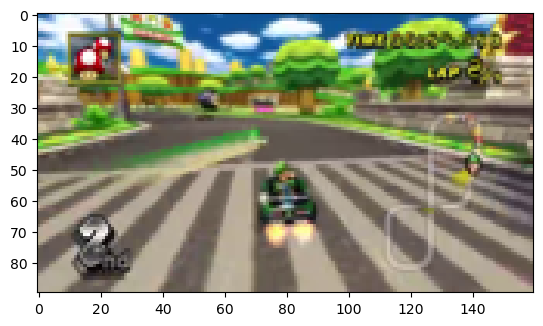

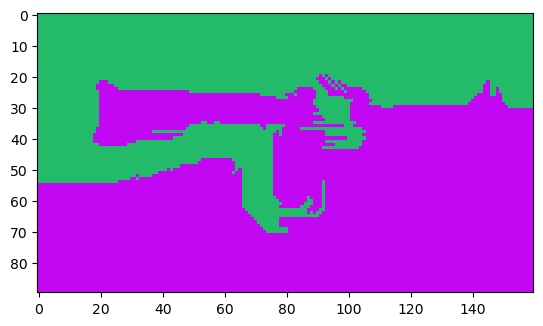

In [4]:
input_file ='../img/mario_in/mario_in_1.npy'
frame_rgb= np.load(input_file)
init_image= PILImage.fromarray(frame_rgb).convert("RGB")

fac=4
init_image = init_image.resize((int(init_image.size[0]/fac),int(init_image.size[1]/fac)))
plt.imshow(init_image)
plt.show()

forest,_=get_segmented_image(paramst, init_image,verbose=True)

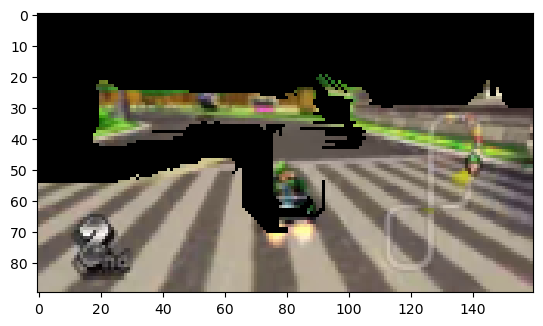

In [5]:
import matplotlib.pyplot as plt

mask=get_mask(forest,init_image)
new_image= np.array(init_image)
new_image[mask == 0] = [0, 0, 0]
plt.imshow(new_image)
plt.show()

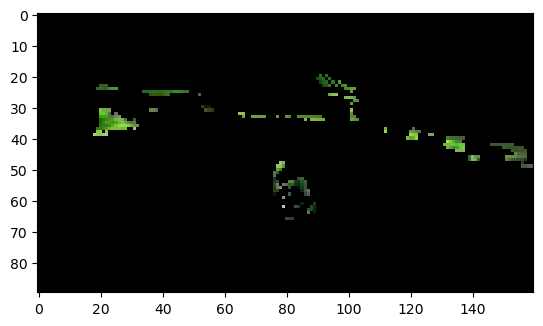

In [6]:
green_mask=get_green_mask(new_image,hue_range=(43, 85))
im=new_image.copy()
im[green_mask == 0] = [0, 0, 0]
plt.imshow(im)
plt.show()

In [7]:
forest, pt=get_segmented_image(params2, im)

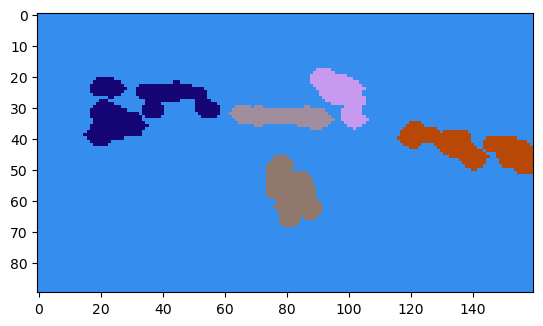

In [8]:
plt.imshow(generate_image(forest, init_image.size[1], init_image.size[0]))
plt.show()

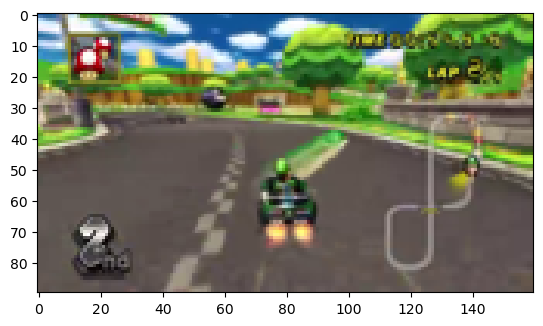

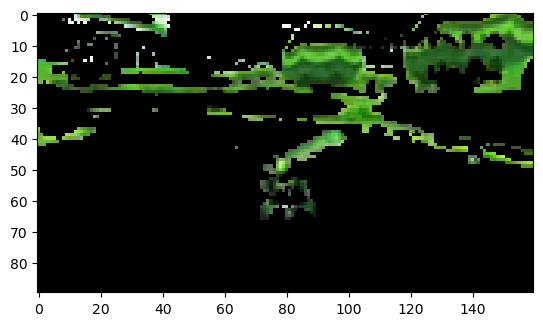

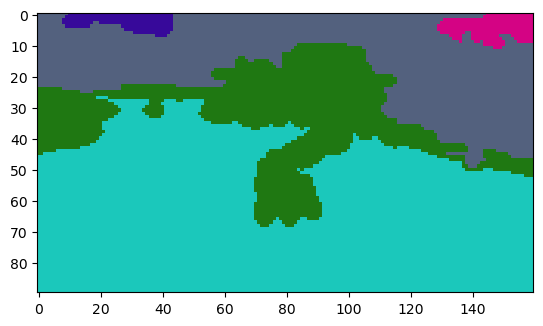

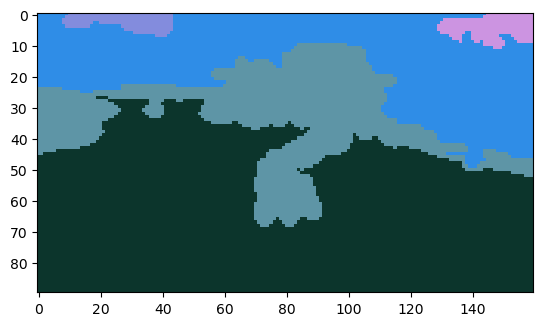

In [9]:
input_file ='../img/mario_in/mario_in_3.npy'
frame_rgb= np.load(input_file)
init_image= PILImage.fromarray(frame_rgb).convert("RGB")

fac=4
init_image = init_image.resize((int(init_image.size[0]/fac),int(init_image.size[1]/fac)))
plt.imshow(init_image)
plt.show()

# forest,_=get_segmented_image(params1, init_image,verbose=True,previous_threshold=pt)
# mask=get_mask(forest,init_image)
new_image= np.array(init_image)
# new_image[mask == 0] = [0, 0, 0]
green_mask=get_green_mask(new_image,hue_range=(43, 85))
im=new_image.copy()
im[green_mask == 0] = [0, 0, 0]
plt.imshow(im)
plt.show()
forest, _=get_segmented_image(params2, im,verbose=True,previous_threshold=pt)
plt.imshow(generate_image(forest, init_image.size[1], init_image.size[0]))
plt.show()

In [10]:
def iterate_frames(video_path, start_time, end_time, num_frames, output_folder,params1,params2,verbose=False):
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)

    start_frame = int(start_time * fps)
    end_frame = int(end_time * fps)

    cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
    previous_threshold=None
    for i in range(num_frames):
        ret, frame = cap.read()
        cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame + i * (end_frame - start_frame) // num_frames)
        if ret:
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            # filename = f'mario_in_{i}.npy'
            # filepath = os.path.join('../img/mario_in', filename)
            # np.save(filepath,frame_rgb)

            init_image = PILImage.fromarray(frame_rgb).convert("RGB")
            fac=4            
            pil_image = init_image.resize((int(init_image.size[0]/fac),int(init_image.size[1]/fac)))

            new_image= np.array(pil_image)
            if i==0:
                forest,_=get_segmented_image(params1, pil_image,verbose,previous_threshold=None)
                mask=get_mask(forest,pil_image)
                new_image[mask == 0] = [0, 0, 0]            
            green_mask=get_green_mask(new_image,hue_range=(40, 85))
            im=new_image.copy()
            im[green_mask == 0] = [0, 0, 0]

            forest,t=get_segmented_image(params2, im,verbose,previous_threshold=previous_threshold)
            frame=nice_plot_ter(forest, init_image,pil_image,fac,verbose)

            filename = f'mario_{i}.JPG'
            filepath = os.path.join(output_folder, filename)
            frame.convert("RGB").resize((int(pil_image.size[0]*fac),int(pil_image.size[1]*fac))).save(filepath)
            # previous_threshold=t
        else:
            print("Fin de la vidéo.")
            break
    cap.release()

video_path = '../video/Mario_Kart.mp4'
t1 = 75#60 + 23 83 ou 104
t2 = 125#60 + 53 

num_frames = (125-75)*30
output_folder = '../img/mario_out/'

iterate_frames(video_path, t1, t2, num_frames, output_folder,params1,params2,verbose=False)

Temps de run du pour 1500 images : 27min22.6s

In [11]:
save_video(fps=30)

Moviepy - Building video ../img/results/my_video.mp4.
Moviepy - Writing video ../img/results/my_video.mp4



Moviepy - Done !
Moviepy - video ready ../img/results/my_video.mp4


To do : donner des importances différentes aux aretes pour garder une memoire de où est luigi. Tenir compte de la vitesse, ou alors mettre en place un rayon